In [66]:
import numpy as np

In [67]:
npzdata=np.load("data.npz")

In [68]:
npzdata

In [69]:
data=npzdata['data']
labels=npzdata['labels']

In [70]:
data

array([[ 1,  1, -1, ..., -1, -1, -1],
       [ 1,  1, -1, ..., -1, -1, -1],
       [ 1,  1, -1, ..., -1, -1, -1],
       ..., 
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int16)

In [71]:
labels

array([u'9gag.com', u'9gag.com', u'9gag.com', ..., None, None, None], dtype=object)

In [72]:
data.shape

(249996, 5000)

In [73]:
import keras.preprocessing.sequence as sq

In [74]:
maxlen=150

In [75]:
data=sq.pad_sequences(data,maxlen=maxlen,padding='post',truncating='post',dtype='float64')

In [76]:
data=data.reshape(data.shape[0],data.shape[1],1)

In [77]:
from keras.utils import np_utils

In [78]:
dict_label={}

In [79]:
n=0

In [80]:
set_labels=list(set(labels))

In [81]:
for l in set_labels:
    dict_label[l]=n
    n+=1

In [82]:
dict_label

{None: 41,
 u'9gag.com': 77,
 u'abs-cbn.com': 99,
 u'adf.ly': 70,
 u'adobe.com': 39,
 u'aliexpress.com': 22,
 u'allegro.pl': 83,
 u'amazon.com': 50,
 u'amazonaws.com': 62,
 u'aol.com': 72,
 u'apple.com': 69,
 u'archive.org': 9,
 u'askcom.me': 71,
 u'battle.net': 96,
 u'blastingnews.com': 7,
 u'booking.com': 57,
 u'breitbart.com': 76,
 u'bukalapak.com': 21,
 u'businessinsider.com': 48,
 u'conservativetribune.com': 56,
 u'dailymail.co.uk': 61,
 u'dailymotion.com': 29,
 u'detik.com': 59,
 u'deviantart.com': 82,
 u'dictionary.com': 27,
 u'digikala.com': 35,
 u'doubleclick.net': 25,
 u'doublepimp.com': 89,
 u'ebay.com': 49,
 u'espncricinfo.com': 5,
 u'exoclick.com': 55,
 u'extratorrent.cc': 64,
 u'facebook.com': 88,
 u'feedly.com': 32,
 u'gamepedia.com': 95,
 u'github.com': 15,
 u'go.com': 94,
 u'godaddy.com': 93,
 u'goodreads.com': 81,
 u'google.com': 98,
 u'hclips.com': 28,
 u'hola.com': 24,
 u'hotmovs.com': 78,
 u'imdb.com': 97,
 u'instructure.com': 80,
 u'intuit.com': 37,
 u'kompas.com'

In [83]:
labels_new=[]

In [84]:
for l in labels:
    labels_new.append(dict_label[l])

In [85]:
label_1=np_utils.to_categorical(labels_new)

In [86]:
label_1

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [87]:
def generateData(data,labels,batch_size=32):
    nb_instances = data.shape[0]
    nb_classes = labels.shape[1]
    sample_shape = data[0].shape
    batch_data_shape = tuple([batch_size] + list(sample_shape))
    batch_label_shape = (batch_size, nb_classes)
    # Infinite loop
    while True:
        # Generate an exploration order
        indices = np.arange(nb_instances)

        np.random.shuffle(indices)

        # Generate batches
        imax = int(len(indices) / batch_size)
        for i in range(imax):
            # Form a batch
            x = np.empty(batch_data_shape)
            y = np.empty(batch_label_shape)
            for j, k in enumerate(indices[i * batch_size: (i + 1) * batch_size]):
                x[j] = data[k]
                y[j] = labels[k]
            if x.shape != batch_data_shape:
                print(x.shape)
                exit(0)
            yield x, y

In [88]:
temp=generateData(data,label_1)

In [89]:
from keras.layers.core import Dense, Dropout
from keras.layers.recurrent import LSTM
from keras.layers import Input
from keras.models import Sequential
from keras.optimizers import RMSprop

In [90]:
model=Sequential()

In [91]:
input_length=maxlen
input_dim=1

In [92]:
model.add(LSTM(input_shape=(input_length,input_dim),units=128,activation='tanh',recurrent_activation='hard_sigmoid',return_sequences=True,dropout=0.2))

In [93]:
model.add(LSTM(units=128,activation='tanh',recurrent_activation='hard_sigmoid',return_sequences=False,dropout=0.2))

In [94]:
nb_classes=label_1.shape[1]

In [95]:
nb_classes

101

In [96]:
model.add(Dense(units=nb_classes,activation='softmax'))

In [97]:
metrics=['accuracy']

In [98]:
optimizer=RMSprop(lr=0.001,decay=0.0)

In [99]:
model.compile(loss="categorical_crossentropy",optimizer=optimizer,metrics=metrics)

In [100]:
print model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 150, 128)          66560     
_________________________________________________________________
lstm_6 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 101)               13029     
Total params: 211,173
Trainable params: 211,173
Non-trainable params: 0
_________________________________________________________________
None


In [101]:
from sklearn import model_selection

In [102]:
X_train, X_test, y_train, y_test =model_selection.train_test_split(data, label_1, test_size=0.33)

In [103]:
trainGen=generateData(X_train,y_train)

In [104]:
valGen=generateData(X_test,y_test)

In [105]:
history=model.fit_generator(generator=trainGen,steps_per_epoch=X_train.shape[0]//32,validation_data=valGen,validation_steps=X_test.shape[0]//32,epochs=5)

Epoch 1/5
5234/5234 [==============================] - 1666s 318ms/step - loss: 3.0031 - acc: 0.2590 - val_loss: 1.9993 - val_acc: 0.4679
Epoch 2/5
5234/5234 [==============================] - 1654s 316ms/step - loss: 1.5708 - acc: 0.5799 - val_loss: 1.2440 - val_acc: 0.6596
Epoch 3/5
5234/5234 [==============================] - 1681s 321ms/step - loss: 1.1537 - acc: 0.6874 - val_loss: 0.9523 - val_acc: 0.7422
Epoch 4/5
5234/5234 [==============================] - 1700s 325ms/step - loss: 0.8885 - acc: 0.7601 - val_loss: 0.7093 - val_acc: 0.8098
Epoch 5/5
5234/5234 [==============================] - 1864s 356ms/step - loss: 0.7314 - acc: 0.8023 - val_loss: 0.6158 - val_acc: 0.8312


In [106]:
import matplotlib.pyplot as plt

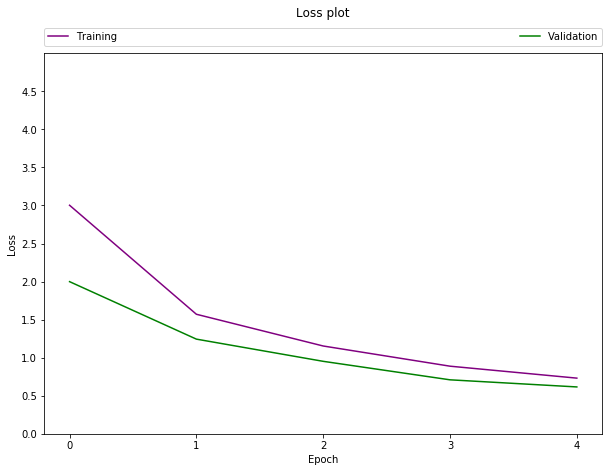

In [126]:
plt.figure(figsize=(10, 7))
plt.plot(history.history['loss'], label="Training", color='purple')
if history.history['val_loss'] is not None:
    plt.ylim(0, 5)
    plt.plot(history.history['val_loss'], label="Validation", color='green')
plt.title("Loss plot", y=1.08)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode='expand', borderaxespad=0.)
plt.yticks(np.arange(0, 5, 0.5))
plt.xticks(np.arange(0, 5, 1))
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.show()

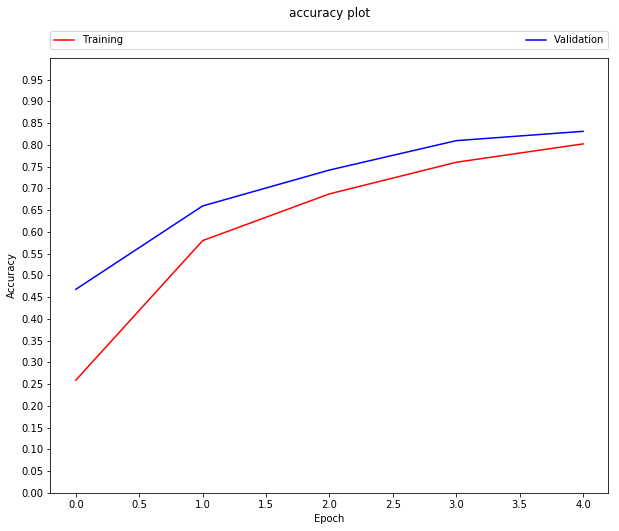

In [127]:
plt.figure(figsize=(10, 8))
plt.ylim(0, 1)
plt.plot(history.history['acc'], label="Training", color='red')
if history.history['val_acc'] is not None:
    plt.plot(history.history['val_acc'], label="Validation", color='blue')
plt.title("accuracy plot", y=1.08)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode='expand', borderaxespad=0.)
plt.yticks(np.arange(0, 1, 0.05))
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()